# Problem 2 – dimensionality reduction (30%)
In this exercise, you will gain experience in using dimensionality-reduction techniques to explore a multivariate dataset from a real domain (nutrition).  The dataset is also included in h2.zip. It includes a large number of food products from the ten different products shown on Table 1 (see Appendix II).  Each food item includes 46 descriptors, as shown on Table 2.  
The dataset is organized as follows:
-	Training set:  Files x1.csv (one row per sample, one column per feature) and c1.csv (each row containing the class label of the corresponding row in x1.csv)
-	Validation set:  Files x2.csv and c2.csv, with similar structure as above.
-	Test set: Files x3.csv with similar structure as above.  The labels for the test data (i.e., c3.csv) are not included.


I referenced this page on how to graph LDA:
https://www.statology.org/linear-discriminant-analysis-in-python/

### 10% credit. Perform PCA on the training set and generate a 2D scatterplot.

To facilitate analysis, please color code each example according to its class label (even though PCA does not use class labels).  Interpret the results. What information do the principal components capture? Is there any class separability? Is there any organization of classes into broader categories of food? …

In [16]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
#read in training data
train_features = pd.read_csv('x1.csv', header=None)
train_classes = pd.read_csv('c1.csv', header=None)

#read in validation set
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

#read in test set, classes are not provided
test_features = pd.read_csv('x3.csv', header=None)

In [18]:
pca_1 = PCA(n_components=2)
components = pca_1.fit_transform(train_features)
print("This tells us the amount of variance explained by each component.")
print(pca_1.explained_variance_ratio_)
print("This tells us the cumulative amount of variance explained by each component.")
print(pca_1.explained_variance_ratio_.cumsum())
print("Thus, based on the cumsum() of the explained variance ratio, I can say that for k = 2, or 2 components, we can explain for 33.3% of the variance in the data.")
print("This is not a really good result!\n")
print("I suppose that this makes sense because we are trying to do dimensionality reduction on something that requires class separation.")
print("LDA would probably be a better choice for this problem.")

This tells us the amount of variance explained by each component.
[0.21698407 0.11626458]
This tells us the cumulative amount of variance explained by each component.
[0.21698407 0.33324865]
Thus, based on the cumsum() of the explained variance ratio, I can say that for k = 2, or 2 components, we can explain for 33.3% of the variance in the data.
This is not a really good result!

I suppose that this makes sense because we are trying to do dimensionality reduction on something that requires class separation.
LDA would probably be a better choice for this problem.


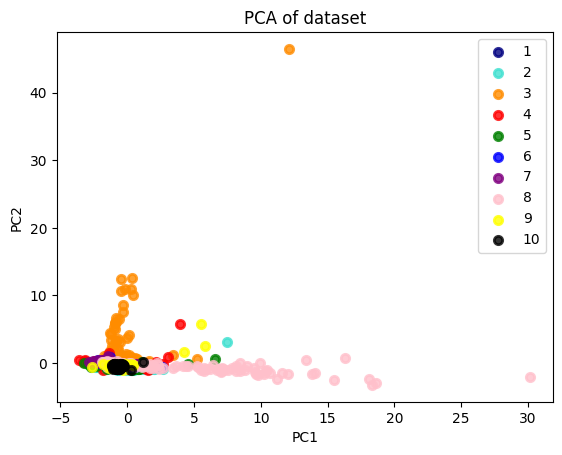

This doesn't look too good, as a lot of the data is not separated well.
There are no visible clusters, and outliers too!


In [19]:
#perform PCA on training set and generate 2d scatterplot
pca = PCA(n_components=2) #we choose 2 components to visualize in 2d
pca.fit(train_features)

#transform training
train_features_pca = pca.transform(train_features)
train_features_pca = pd.DataFrame(train_features_pca) #convert to dataframe

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(train_features_pca[train_classes[0] == i][0], train_features_pca[train_classes[0] == i][1], color=color, alpha=.8, lw=lw,
                label=i + 1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

print("This doesn't look too good, as a lot of the data is not separated well.")
print("There are no visible clusters, and outliers too!")

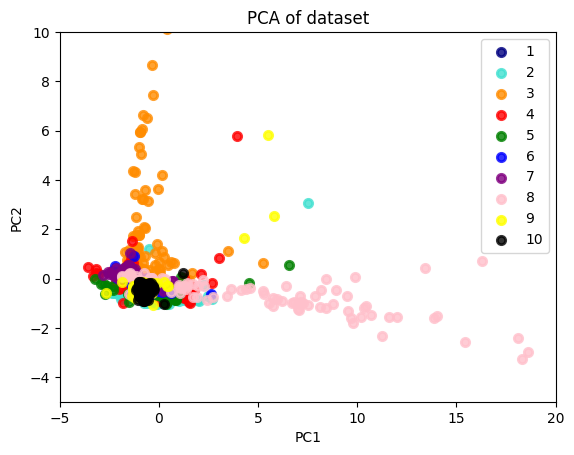

In [20]:
#now we zoom in on the data
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(train_features_pca[train_classes[0] == i][0], train_features_pca[train_classes[0] == i][1], color=color, alpha=.8, lw=lw,
                label=i + 1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-5, 20)
plt.ylim(-5, 10)
plt.show()


### 5% credit. Generate a scree plot and interpret the results.  
How many PCs are required to capture 95% of the variance in the data? Does the scree plot suggest there is high or low collinearity between features? …

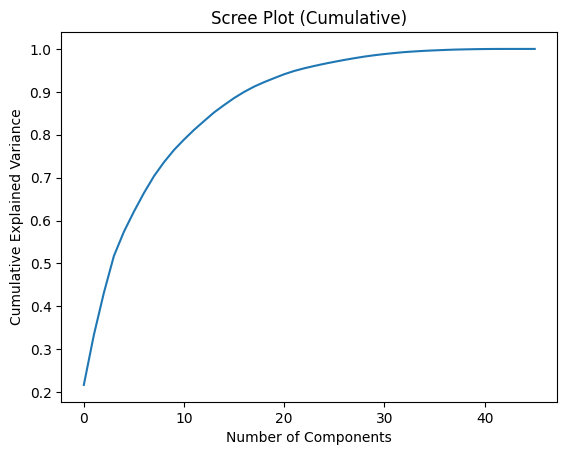

To capture 95% of the variance, we need 23 components.
This reflects the explained_variance_ratio_.cumsum() result from above.
Overall, this means that PCA is probably not a good choice of dimensionality reduction
as we require a lot of components to capture the variance in the data.


In [36]:
#generate scree plot and interpret to find out how many PCs are required to capture 95% of the variance
pca = PCA()
pca.fit(train_features)
variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Cumulative)')
plt.show()

#to capture 95% of the variance, we need
print('To capture 95% of the variance, we need', np.where(np.cumsum(variance) >= 0.95)[0][0] + 1, 'components.')
print("This reflects the explained_variance_ratio_.cumsum() result from above.")
print("Overall, this means that PCA is probably not a good choice of dimensionality reduction")
print("as we require a lot of components to capture the variance in the data.")

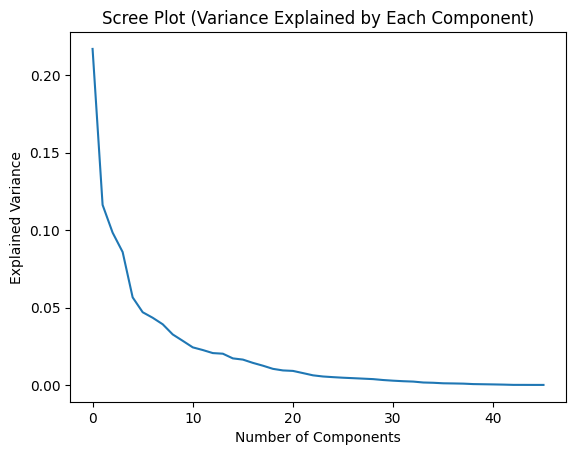

In [38]:
pca = PCA()
pca.fit(train_features)
variance = pca.explained_variance_ratio_
plt.plot(variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot (Variance Explained by Each Component)')
plt.show()

#### Extra, I want to see a 3d plot of the data so I can see other pcs

### 10% credit. Repeat part a. using Fisher’s LDA. 
- In this case, you will use the training data (x1.csv, c1.csv) to obtain the LDA eigenvector matrix (w1).  
- Then, use matrix w1 to project the training examples (x1.csv), and generate a scatter plot.   
- Finally, use matrix w1 to project the validation samples (x2.csv).  As in problem 1, please color code the scatterplots according to class labels.  Discuss your findings.  
- Does the LDA scatter plot for training data show any structure?  Describe that structure.  Do these results hold when you project the (unseen) validation data?  Please elaborate.  

For reference, I used this page to find out how to apply LDA:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In general, I used the scikit-learn documentation to figure out/structure some of my code, so there are similarities in name and layout.

In [23]:
#imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#use Fisher's LDA and use training set to obtain LDA eigenvector matrix w1
train_features = pd.read_csv('x1.csv', header=None)
train_classes = pd.read_csv('c1.csv', header=None)

In [24]:
#perform LDAs on training set and generate 2d scatterplot
#obtain LDA eigenvector matrix w1
lda = LDA(n_components=2)
lda.fit(train_features, train_classes)
w1 = lda.coef_
print('LDA eigenvector matrix w1:', w1)

LDA eigenvector matrix w1: [[ 1.37793095e+01 -4.51672382e+00  1.96025724e+00  1.26727896e+01
   6.27396038e-01  2.08014589e+01  1.70194437e-01 -1.03998469e+00
   2.59535246e+00 -2.82813010e-02 -1.68335301e-01  4.36188718e-02
  -1.60564354e+00 -5.59978416e-01 -2.37566000e+00 -1.97429143e-01
  -8.77337411e-01  1.23620672e+00  2.49050284e-02 -1.41904344e-02
   1.82537373e+00 -1.12556447e+00  4.12050222e-01 -1.61963119e+00
   4.79367315e-01 -9.75192676e+00 -3.44554753e+00  9.86670431e+00
  -1.25086664e+00  4.71815634e+00 -1.73998484e+01  1.49177818e+01
   2.13727714e+00 -1.12145788e-01 -3.24782946e-01  3.04519815e-01
  -2.00772773e-01 -5.22497092e-02 -3.13519055e-01 -2.00541140e+00
   4.88348849e-01  3.85610857e+00 -5.93008426e-01 -2.50839397e-01
  -5.23860968e-01 -3.33064279e-01]
 [ 3.80643013e+01  4.28344321e+00  5.02948426e+00  1.32312719e+01
   4.59411818e+00  3.07365317e+01  1.16338268e+00 -7.74352648e-01
  -1.03143993e+00  2.89108642e-01  1.06364476e+00 -8.73259373e-01
   1.47919745e

c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


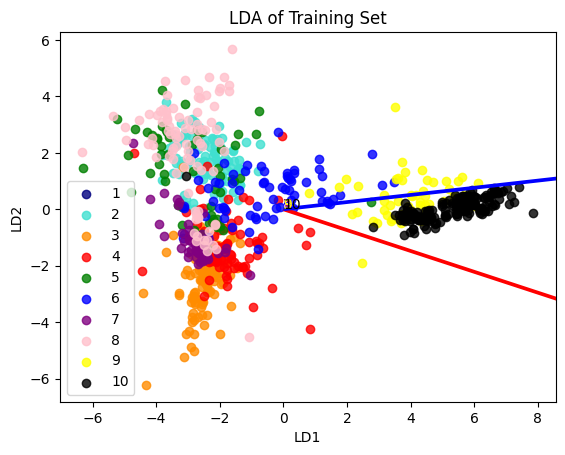

In [25]:
transform_feature = lda.transform(train_features)

#plot each class with a different color
plt.figure()

#there are 10 classes, so we need 10 colors
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, range(10)):
    plt.scatter(transform_feature[train_classes[0] == i, 0], transform_feature[train_classes[0] == i, 1], alpha=.8, color=color,
                label=i + 1)  # Add 1 to i to start labels at 1

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Training Set')

# Show labels for each class
for i in range(10):
    plt.text(0, 0, str(i + 1), color=colors[i])  # Add 1 to i in the label

#plot eigenvectors
plt.quiver(0, 0, w1[0][0], w1[0][1], color='r', scale=5)
plt.quiver(0, 0, w1[1][0], w1[1][1], color='b', scale=5)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()




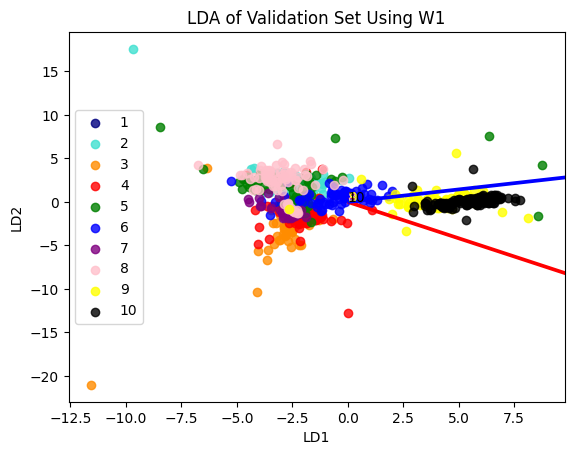

In [26]:
#use matrix w1 to project validation set onto 2d space
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

transform_validation_feature = lda.transform(val_features)

#plot each class with a different color
plt.figure()

#there are 10 classes, so we need 10 colors
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, range(10)):
    plt.scatter(transform_validation_feature[val_classes[0] == i, 0], transform_validation_feature[val_classes[0] == i, 1], alpha=.8, color=color,
                label=i + 1)  # Add 1 to i to start labels at 1
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Validation Set Using W1')

# Show labels for each class

for i in range(10):
    plt.text(0, 0, str(i + 1), color=colors[i])  # Add 1 to i in the label
    
#plot eigenvectors
plt.quiver(0, 0, w1[0][0], w1[0][1], color='r', scale=5)
plt.quiver(0, 0, w1[1][0], w1[1][1], color='b', scale=5)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


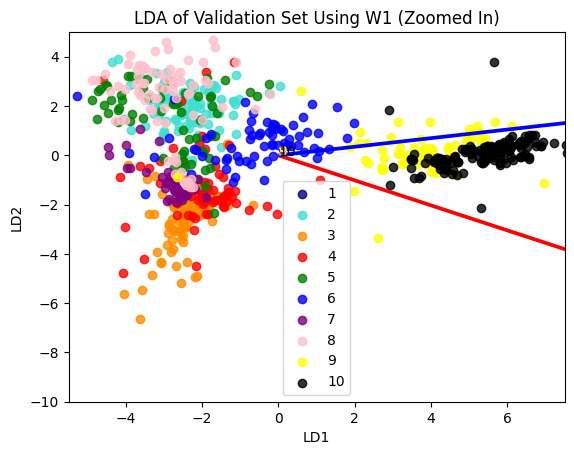

In [27]:
#use matrix w1 to project validation set onto 2d space
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

transform_validation_feature = lda.transform(val_features)

#plot each class with a different color
plt.figure()

#there are 10 classes, so we need 10 colors
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'blue', 'purple', 'pink', 'yellow', 'black']
lw = 2

for color, i in zip(colors, range(10)):
    plt.scatter(transform_validation_feature[val_classes[0] == i, 0], transform_validation_feature[val_classes[0] == i, 1], alpha=.8, color=color,
                label=i + 1)  # Add 1 to i to start labels at 1
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Validation Set Using W1 (Zoomed In)')

# Show labels for each class

for i in range(10):
    plt.text(0, 0, str(i + 1), color=colors[i])  # Add 1 to i in the label
    
#plot eigenvectors
plt.quiver(0, 0, w1[0][0], w1[0][1], color='r', scale=5)
plt.quiver(0, 0, w1[1][0], w1[1][1], color='b', scale=5)

plt.xlim(-5.5, 7.5)
plt.ylim(-10, 5)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


### 5% credit. Repeat part b. using Fisher’s LDA.

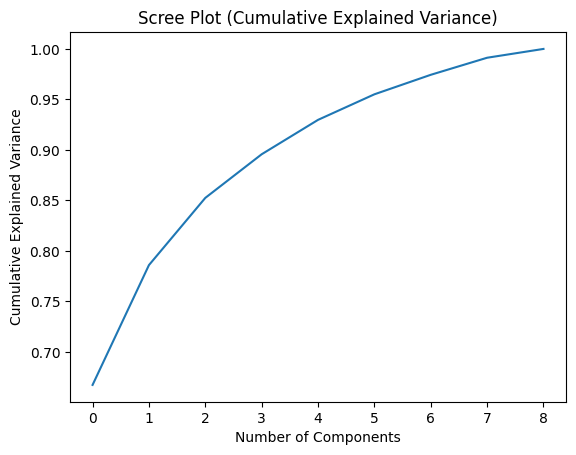

To capture 95% of the variance, we need 6 components.
To capture 100% of the variance, we need 9 components.
This is a lot better than the results from PCA! We require a lot less components to capture 95% variance.


In [34]:
#generate scree plot using LDAs and interpret to find out how many LDAs are required to capture 95% of the variance
lda = LDA()
lda.fit(train_features, train_classes.values.ravel())
variance = lda.explained_variance_ratio_
plt.plot(np.cumsum(variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.show()

#to capture 95% of the variance, we need
print('To capture 95% of the variance, we need', np.where(np.cumsum(variance) >= 0.95)[0][0] + 1, 'components.')
print('To capture 100% of the variance, we need', np.where(np.cumsum(variance) >= 1)[0][0] + 1, 'components.')
print("This is a lot better than the results from PCA! We require a lot less components to capture 95% variance.")

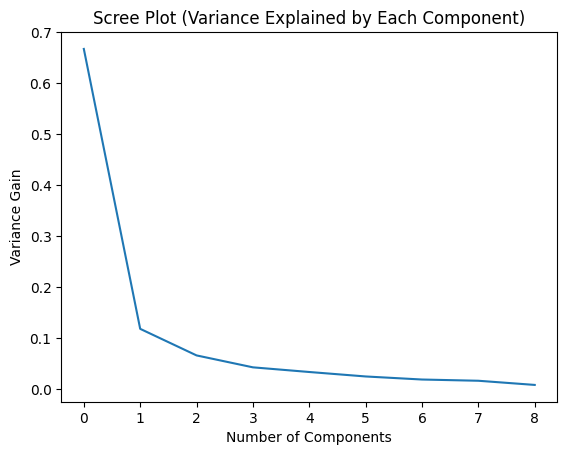

In [35]:
#generate scree plot using LDAs and interpret to find out how many LDAs are required to capture 95% of the variance
lda = LDA()
lda.fit(train_features, train_classes.values.ravel())
variance = lda.explained_variance_ratio_
plt.plot(variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance Gain')
plt.title('Scree Plot (Variance Explained by Each Component)')
plt.show()

#### 5% extra credit. Experiment with a different type of dimensionality reduction, such as t-SNE, Isomap, or MDS (see manifold learning).
Interpret your results. 

In [29]:
#